# Weather relation to cities coordinates

## Dependecies and configuration

In [1]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests

from scipy import stats

# Import keys.
from api_keys import weather_api_key
from api_keys import g_key

# Dataset location.
cities_json_file_path = os.path.join('Resources', 'city.list.json')

# Output file for 1000 unique cities (is good sample out of 200K cities)
one_thousand_unique_cities_path = os.path.join('output', 'one_thousand_unique_cities.csv')

# Weather API configuration
weather_api_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Base query URL
base_weather_data_for_a_city_url = f"{weather_api_url}appid={weather_api_key}&units={units}"


## Load dataset of cities and prepare sample dataframe

In [2]:
# Read cities dataset.
cities_df = pd.read_json(cities_json_file_path)

cities_coordinates = pd.json_normalize(cities_df['coord'])

cities_df = cities_df.merge(cities_coordinates, left_index=True, right_index=True)
cities_df.drop(columns=['coord'], inplace=True)

total_cities_count = cities_df['id'].unique()
print(f'Number of cities loaded: {len(total_cities_count)}')

Number of cities loaded: 209579


### Preparing sample of cities dataframe

In [3]:
# Divide cities in four groups.
# Each group will be made using the main imaginary lines dividing the Earth (the Prime meridian and the Equator).

# Cities in the first quadrant (longitude is negative and latitude is positive)
first_quadrant_cities = (cities_df['lon'] < 0) & (cities_df['lat'] > 0)
first_quadrant_cities_df = cities_df.loc[first_quadrant_cities]

# Cities in the second quadrant (both longitude and latitude are positive)
second_quadrant_cities = (cities_df['lon'] > 0) & (cities_df['lat'] > 0)
second_quadrant_cities_df = cities_df.loc[second_quadrant_cities]

# Cities in the third quadrant (both longitude and latitude are negative)
third_quadrant_cities = (cities_df['lon'] < 0) & (cities_df['lat'] < 0)
third_quadrant_cities_df = cities_df.loc[third_quadrant_cities]

# Cities in the fourth quadrant (longitude is positive and latitude is negative)
fourth_quadrant_cities = (cities_df['lon'] > 0) & (cities_df['lat'] < 0)
fourth_quadrant_cities_df = cities_df.loc[fourth_quadrant_cities]

# Get 1000 random unique cities in the world
temp_df = first_quadrant_cities_df.sample(250)
one_thousand_cities = pd.DataFrame(temp_df)

temp_df = second_quadrant_cities_df.sample(250)
one_thousand_cities = one_thousand_cities.append(temp_df)

temp_df = third_quadrant_cities_df.sample(250)
one_thousand_cities = one_thousand_cities.append(temp_df)

temp_df = fourth_quadrant_cities_df.sample(250)
one_thousand_cities = one_thousand_cities.append(temp_df)

one_thousand_cities.reset_index(inplace=True)

sample_cities_count = one_thousand_cities['id'].unique()
print(f'Number of sample cities: {len(sample_cities_count)}')


Number of sample cities: 1000


## Start calculations and building plots

In [4]:
# Get weather data for all 1000 unique cities

counter = 0

print("Start data request...")

# Loop through the list of cities and perform a request for data on each
for index, city in one_thousand_cities.iterrows():
    id_param = f"&id={city['id']}"
    counter += 1
    
    # Include a print log of each city as it's being processed with the city number and city name.
    print(f"{counter} - Getting weather data for: {city['id']} - {city['name']}, {city['country']} ... ")
    response = requests.get(base_weather_data_for_a_city_url + id_param).json()
    print(f"Data received.")

    temperature = response['main']['temp']
    humidity = response['main']['humidity']
    cloudiness = response['clouds']['all']
    wind_speed = response['wind']['speed']
    weather_condition = response['weather'][0]['main']
    weather_condition_desc = response['weather'][0]['description']
    
    one_thousand_cities.loc[index, 'temperature'] = temperature
    one_thousand_cities.loc[index, 'humidity'] = humidity
    one_thousand_cities.loc[index, 'cloudiness'] = cloudiness
    one_thousand_cities.loc[index, 'wind_speed'] = wind_speed
    one_thousand_cities.loc[index, 'weather_condition'] = weather_condition
    one_thousand_cities.loc[index, 'weather_condition_desc'] = weather_condition_desc
print("Data request completed.")

one_thousand_cities = one_thousand_cities.reset_index()
one_thousand_cities.info()


Start data request...
1 - Getting weather data for: 5098132 - Fort Dix, US ... 
Data received.
2 - Getting weather data for: 5564730 - Happy Camp, US ... 
Data received.
3 - Getting weather data for: 2546906 - Ifrane, MA ... 
Data received.
4 - Getting weather data for: 3822810 - Quintana, MX ... 
Data received.
5 - Getting weather data for: 3237474 - La Falaise, JE ... 
Data received.
6 - Getting weather data for: 6857857 - Charlesland, IE ... 
Data received.
7 - Getting weather data for: 5470711 - Harkey Crossing, US ... 
Data received.
8 - Getting weather data for: 3028217 - Caudan, FR ... 
Data received.
9 - Getting weather data for: 4562635 - Arecibo, PR ... 
Data received.
10 - Getting weather data for: 5793294 - Easton, US ... 
Data received.
11 - Getting weather data for: 8010581 - Lousada, PT ... 
Data received.
12 - Getting weather data for: 8012546 - Algueirão-Mem Martins, PT ... 
Data received.
13 - Getting weather data for: 8012553 - Pêro Pinheiro, PT ... 
Data received.
1

Data received.
108 - Getting weather data for: 2961894 - Rathmolyon, IE ... 
Data received.
109 - Getting weather data for: 6358543 - Villanueva del Arzobispo, ES ... 
Data received.
110 - Getting weather data for: 6361789 - Paredes de Escalona, ES ... 
Data received.
111 - Getting weather data for: 4017758 - Bácum, MX ... 
Data received.
112 - Getting weather data for: 3117746 - Madiedo, ES ... 
Data received.
113 - Getting weather data for: 3621832 - San Josecito, CR ... 
Data received.
114 - Getting weather data for: 5392567 - San Rafael, US ... 
Data received.
115 - Getting weather data for: 2528650 - Tifni, MA ... 
Data received.
116 - Getting weather data for: 3120307 - Irueste, ES ... 
Data received.
117 - Getting weather data for: 2554997 - Boudinar, MA ... 
Data received.
118 - Getting weather data for: 6361657 - Villel, ES ... 
Data received.
119 - Getting weather data for: 4734864 - Sullivan City, US ... 
Data received.
120 - Getting weather data for: 3634696 - Lobatera, VE 

214 - Getting weather data for: 3376386 - Potaro-Siparuni Region, GY ... 
Data received.
215 - Getting weather data for: 3042245 - Crosby, IM ... 
Data received.
216 - Getting weather data for: 5699979 - Sutherland, US ... 
Data received.
217 - Getting weather data for: 4519510 - New Concord, US ... 
Data received.
218 - Getting weather data for: 4891051 - Elmwood Park, US ... 
Data received.
219 - Getting weather data for: 3707715 - La Florecita, PA ... 
Data received.
220 - Getting weather data for: 5244703 - Barneveld, US ... 
Data received.
221 - Getting weather data for: 3603256 - Protección, HN ... 
Data received.
222 - Getting weather data for: 4467580 - Gamewell, US ... 
Data received.
223 - Getting weather data for: 4845898 - Windham, US ... 
Data received.
224 - Getting weather data for: 3311784 - Caherconnell, IE ... 
Data received.
225 - Getting weather data for: 5534109 - Wolfforth, US ... 
Data received.
226 - Getting weather data for: 3525491 - La Libertad, MX ... 
Data 

Data received.
322 - Getting weather data for: 3062806 - Vítkovice, CZ ... 
Data received.
323 - Getting weather data for: 545400 - Konokovo, RU ... 
Data received.
324 - Getting weather data for: 6439840 - Rouvroy, FR ... 
Data received.
325 - Getting weather data for: 2809984 - Wetter (Ruhr), DE ... 
Data received.
326 - Getting weather data for: 3219193 - Cercivento, IT ... 
Data received.
327 - Getting weather data for: 2887355 - Kludenbach, DE ... 
Data received.
328 - Getting weather data for: 1484846 - Andijan, UZ ... 
Data received.
329 - Getting weather data for: 1821301 - Pursat, KH ... 
Data received.
330 - Getting weather data for: 8200836 - Huyen Phong Chau, VN ... 
Data received.
331 - Getting weather data for: 1609395 - Krathum Baen, TH ... 
Data received.
332 - Getting weather data for: 2980885 - Saint-Denis-en-Val, FR ... 
Data received.
333 - Getting weather data for: 1691499 - Rosario, PH ... 
Data received.
334 - Getting weather data for: 6550521 - Staitz, DE ... 
D

Data received.
429 - Getting weather data for: 732252 - Obshtina Dimovo, BG ... 
Data received.
430 - Getting weather data for: 6447254 - Chaliers, FR ... 
Data received.
431 - Getting weather data for: 6555595 - Ruppertshofen, DE ... 
Data received.
432 - Getting weather data for: 492162 - Slantsy, RU ... 
Data received.
433 - Getting weather data for: 6534846 - Perletto, IT ... 
Data received.
434 - Getting weather data for: 3069221 - Obecnice, CZ ... 
Data received.
435 - Getting weather data for: 1817518 - Baima, CN ... 
Data received.
436 - Getting weather data for: 6554403 - Berkoth, DE ... 
Data received.
437 - Getting weather data for: 3046336 - Pincehely, HU ... 
Data received.
438 - Getting weather data for: 6534798 - Vallada Agordina, IT ... 
Data received.
439 - Getting weather data for: 3182904 - Arcore, IT ... 
Data received.
440 - Getting weather data for: 1720988 - Kaliliog, PH ... 
Data received.
441 - Getting weather data for: 6535715 - Massalengo-Motta Vigana, IT ...

Data received.
536 - Getting weather data for: 3855201 - Garré, AR ... 
Data received.
537 - Getting weather data for: 3447533 - Siriri, BR ... 
Data received.
538 - Getting weather data for: 3459876 - Jitaúna, BR ... 
Data received.
539 - Getting weather data for: 3460773 - Itapaci, BR ... 
Data received.
540 - Getting weather data for: 3439163 - Carayaó, PY ... 
Data received.
541 - Getting weather data for: 3865888 - Florentino Ameghino, AR ... 
Data received.
542 - Getting weather data for: 3450404 - Santa Bárbara d'Oeste, BR ... 
Data received.
543 - Getting weather data for: 7874480 - Morro da Cruz, BR ... 
Data received.
544 - Getting weather data for: 3461689 - Herculândia, BR ... 
Data received.
545 - Getting weather data for: 3451950 - Quintana, BR ... 
Data received.
546 - Getting weather data for: 3471544 - Argirita, BR ... 
Data received.
547 - Getting weather data for: 3431271 - Lomas de Zamora, AR ... 
Data received.
548 - Getting weather data for: 3860733 - Colonia Río 

Data received.
642 - Getting weather data for: 3846514 - Los Altos, AR ... 
Data received.
643 - Getting weather data for: 3946937 - Azángaro, PE ... 
Data received.
644 - Getting weather data for: 3460599 - Itatiaiuçu, BR ... 
Data received.
645 - Getting weather data for: 3450963 - Rolante, BR ... 
Data received.
646 - Getting weather data for: 3915491 - Guachara, BO ... 
Data received.
647 - Getting weather data for: 3459901 - Jetibá, BR ... 
Data received.
648 - Getting weather data for: 3451635 - Restinga, BR ... 
Data received.
649 - Getting weather data for: 3863833 - Brinkmann, AR ... 
Data received.
650 - Getting weather data for: 3445222 - Veríssimo, BR ... 
Data received.
651 - Getting weather data for: 3859833 - Cruz Chica, AR ... 
Data received.
652 - Getting weather data for: 3462372 - Goiás, BR ... 
Data received.
653 - Getting weather data for: 3444201 - Puerto Quijarro, BO ... 
Data received.
654 - Getting weather data for: 3863379 - Caleta Olivia, AR ... 
Data receive

Data received.
747 - Getting weather data for: 3429171 - San Cayetano, AR ... 
Data received.
748 - Getting weather data for: 3450166 - Santa Leopoldina, BR ... 
Data received.
749 - Getting weather data for: 3456977 - Moita Bonita, BR ... 
Data received.
750 - Getting weather data for: 3461055 - Iracemápolis, BR ... 
Data received.
751 - Getting weather data for: 7350366 - Karangbayat, ID ... 
Data received.
752 - Getting weather data for: 8025634 - Sukamaju, ID ... 
Data received.
753 - Getting weather data for: 2170435 - Coorparoo, AU ... 
Data received.
754 - Getting weather data for: 982393 - Lokaleng, ZA ... 
Data received.
755 - Getting weather data for: 2157627 - Millthorpe, AU ... 
Data received.
756 - Getting weather data for: 7463834 - Hila, ID ... 
Data received.
757 - Getting weather data for: 2067994 - Lakewood, AU ... 
Data received.
758 - Getting weather data for: 2143295 - Wivenhoe, AU ... 
Data received.
759 - Getting weather data for: 2191862 - Deborah, NZ ... 
Data 

Data received.
855 - Getting weather data for: 7035377 - Tumpang, ID ... 
Data received.
856 - Getting weather data for: 7920474 - Pataruman, ID ... 
Data received.
857 - Getting weather data for: 7839485 - Claremont, AU ... 
Data received.
858 - Getting weather data for: 935661 - Le Butor, RE ... 
Data received.
859 - Getting weather data for: 2067089 - Maningrida, AU ... 
Data received.
860 - Getting weather data for: 2143803 - Whiterock, AU ... 
Data received.
861 - Getting weather data for: 2159040 - Maitland Municipality, AU ... 
Data received.
862 - Getting weather data for: 8023932 - Golacir, ID ... 
Data received.
863 - Getting weather data for: 7081633 - Jegu, ID ... 
Data received.
864 - Getting weather data for: 434147 - Rutana Province, BI ... 
Data received.
865 - Getting weather data for: 7927940 - Burujul Tengah, ID ... 
Data received.
866 - Getting weather data for: 2165710 - Gerangamete, AU ... 
Data received.
867 - Getting weather data for: 161100 - Boma la Ngombe, TZ

Data received.
962 - Getting weather data for: 2142715 - Yabba North, AU ... 
Data received.
963 - Getting weather data for: 7380655 - Lokolande, ID ... 
Data received.
964 - Getting weather data for: 7036103 - Kembangan, ID ... 
Data received.
965 - Getting weather data for: 933313 - Makobeng, BW ... 
Data received.
966 - Getting weather data for: 1633025 - Palumbungan, ID ... 
Data received.
967 - Getting weather data for: 939270 - Witbank, ZA ... 
Data received.
968 - Getting weather data for: 1630200 - Rajapolah, ID ... 
Data received.
969 - Getting weather data for: 2176102 - Beremboke, AU ... 
Data received.
970 - Getting weather data for: 8064112 - Kaom, ID ... 
Data received.
971 - Getting weather data for: 7351093 - Banjar Anyar, ID ... 
Data received.
972 - Getting weather data for: 1969795 - Baraka, ID ... 
Data received.
973 - Getting weather data for: 8060045 - Krajan Tegalombo, ID ... 
Data received.
974 - Getting weather data for: 7375795 - Ketangi, ID ... 
Data received

## Save data in CSV format

In [5]:
one_thousand_cities.to_csv(one_thousand_unique_cities_path, index = False, header=True)


## Create scatter plots

### Functions

In [6]:
# Get middle point
def get_middle_point(a_series):
    middle = ((a_series.max() + a_series.min() ) / 2)
    return middle

# Print scatter plot and save the plot as an image
def print_scatter_plot_with_regression_equation(x_series, y_series, marker, title, y_label, x_label, file_name, regress_values = None, line_eq = None):
    
    # Build scatter plot
    plt.scatter(x_series, y_series, marker = marker)
    
    if regress_values is not None:
        # Build line equation and annotate it to the scatter plot
        plt.plot(x_series, regress_values, "r-")
        plt.annotate(line_eq, (get_middle_point(x_series), get_middle_point(y_series)), fontsize = 15, color = "red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)
    
    # Save the figure
    plt.savefig("output/" + file_name)
    
    # Show plot
    plt.show()

# Perform linear regression. Return regressed values, the linear equation and the r-value
def linear_regression_with_equation(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    return regress_values, line_equation

### Scatter plots

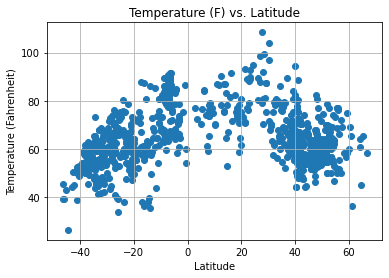

In [7]:
# Temperature (F) vs. Latitude

print_scatter_plot_with_regression_equation(
    one_thousand_cities["lat"],
    one_thousand_cities["temperature"],
    "o",
    "Temperature (F) vs. Latitude",
    "Temperature (Fahrenheit)",
    "Latitude",
    "TemperatureVSLatitude.png"
)

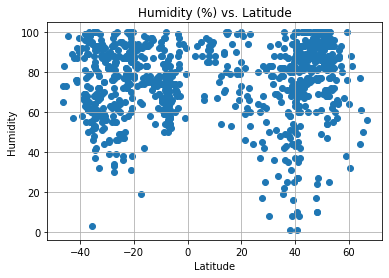

In [8]:
# Humidity (%) vs. Latitude

print_scatter_plot_with_regression_equation(
    one_thousand_cities["lat"],
    one_thousand_cities["humidity"],
    "o",
    "Humidity (%) vs. Latitude",
    "Humidity",
    "Latitude",
    "HumidityVSLatitude.png"
)

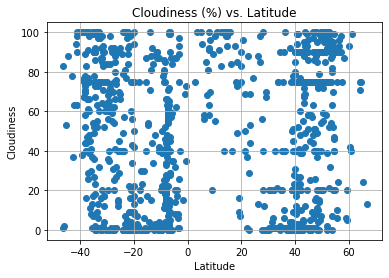

In [9]:
# Cloudiness (%) vs. Latitude

print_scatter_plot_with_regression_equation(
    one_thousand_cities["lat"],
    one_thousand_cities["cloudiness"],
    "o",
    "Cloudiness (%) vs. Latitude",
    "Cloudiness",
    "Latitude",
    "CloudinessVSLatitude.png"
)

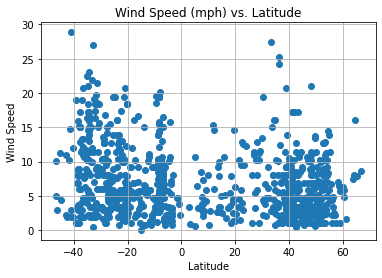

In [10]:
# Wind Speed (mph) vs. Latitude

print_scatter_plot_with_regression_equation(
    one_thousand_cities["lat"],
    one_thousand_cities["wind_speed"],
    "o",
    "Wind Speed (mph) vs. Latitude",
    "Wind Speed",
    "Latitude",
    "WindSpeedVSLatitude.png"
)

### Linear regression by Hemisphere

In [11]:
# Divide cities by hemispheres

northern_hemisphere_df = one_thousand_cities.loc[one_thousand_cities['lat'] > 0]
southern_hemisphere_df = one_thousand_cities.loc[one_thousand_cities['lat'] < 0]


The r-squared is: 0.2855280536076238


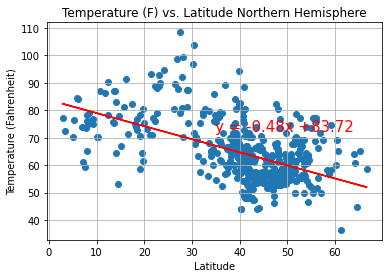

The r-squared is: 0.4694619134492107


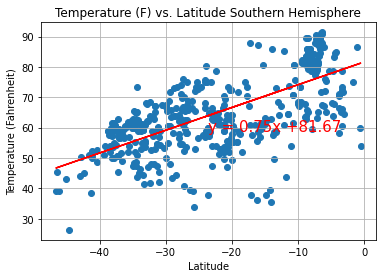

In [12]:
# Perform a linear regression on temperature vs. latitude for the northern hemisphere

(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["temperature"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["temperature"],
    "o",
    "Temperature (F) vs. Latitude Northern Hemisphere",
    "Temperature (Fahrenheit)",
    "Latitude",
    "TemperatureVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on temperature vs. latitude for the southern hemisphere

(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["temperature"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["temperature"],
    "o",
    "Temperature (F) vs. Latitude Southern Hemisphere",
    "Temperature (Fahrenheit)",
    "Latitude",
    "TemperatureVSLatitude-SH.png",
    regress_values,
    line_eq
)


The r-squared is: 0.009531987573598895


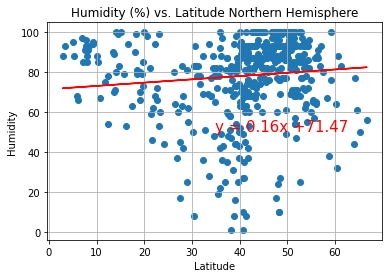

The r-squared is: 0.0014643875766812927


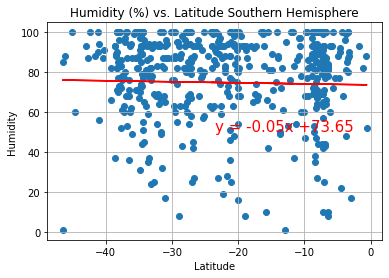

In [13]:
# Perform a linear regression on Humidity (%) vs. latitude for the northern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["humidity"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["humidity"],
    "o",
    "Humidity (%) vs. Latitude Northern Hemisphere",
    "Humidity",
    "Latitude",
    "HumidityVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on Humidity (%) vs. latitude for the southern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["humidity"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    northern_hemisphere_df["humidity"],
    "o",
    "Humidity (%) vs. Latitude Southern Hemisphere",
    "Humidity",
    "Latitude",
    "HumidityVSLatitude-SH.png",
    regress_values,
    line_eq
)

The r-squared is: 0.0017000603791585197


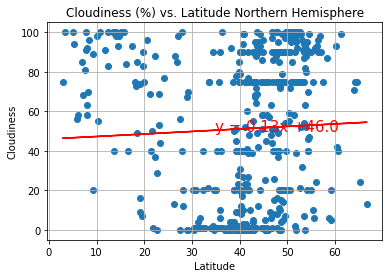

The r-squared is: 0.0741527755681648


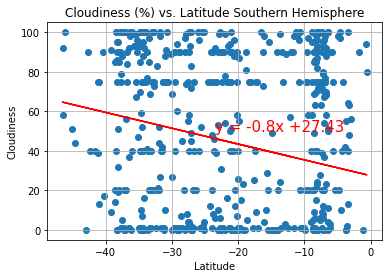

In [14]:
# Perform a linear regression on Cloudiness (%) vs. latitude for the northern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["cloudiness"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["cloudiness"],
    "o",
    "Cloudiness (%) vs. Latitude Northern Hemisphere",
    "Cloudiness",
    "Latitude",
    "CloudinessVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on Cloudiness (%) vs. latitude for the southern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["cloudiness"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    northern_hemisphere_df["cloudiness"],
    "o",
    "Cloudiness (%) vs. Latitude Southern Hemisphere",
    "Cloudiness",
    "Latitude",
    "CloudinessVSLatitude-SH.png",
    regress_values,
    line_eq
)

The r-squared is: 0.001145501150721609


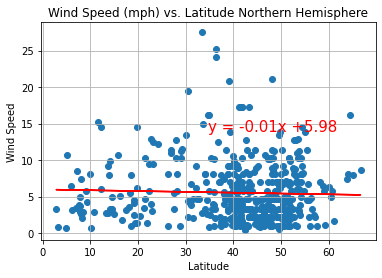

The r-squared is: 0.021600426969189224


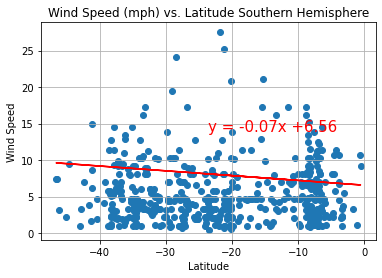

In [15]:
# Perform a linear regression on Wind Speed (mph) vs. latitude for the northern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["wind_speed"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["wind_speed"],
    "o",
    "Wind Speed (mph) vs. Latitude Northern Hemisphere",
    "Wind Speed",
    "Latitude",
    "WindSpeedVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on Wind Speed (%) vs. latitude for the southern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["wind_speed"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    northern_hemisphere_df["wind_speed"],
    "o",
    "Wind Speed (mph) vs. Latitude Southern Hemisphere",
    "Wind Speed",
    "Latitude",
    "WindSpeedVSLatitude-SH.png",
    regress_values,
    line_eq
)